# 04 Parameter estimation under MB3 treatment

We use the same as for artemisinin and indomethacin

## Initiation

In [23]:
import numpy as np
from itertools import combinations

import SCB_estimate as SCBe
import Custom_Estimation_Routines as CER
import Error_Model as EM
import Selection_Criteria as SC
import Profile_Likelihood as PL
import Generalized_Profile_Likelihood as GPL

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import rc
%matplotlib inline

rc('text', usetex=False)
rc('font', **{'family': 'sans-serif', 'sans-serif':'DejaVu Sans'})
rc('mathtext', **{'fontset': 'custom', 'rm':'DejaVu Sans', 'it':'DejaVu Sans:italic', 'bf':'DejaVu Sans:bold'})

experiment='Experiments_1-3'
Experiments=(1, 2, 3)

duration=5

Disp_params=(0,2,3,4)

t=np.arange(duration)

if len(Experiments)==1:
    experiment=Experiments[0]
    DMSO_data=np.genfromtxt('../data/Cell_counts_%i_DMSO.csv'%(experiment))[:,:duration]
    MB3_data=np.genfromtxt('../data/Cell_counts_%i_MB3.csv'%(experiment))[:,:duration]
else:
    N=len(Experiments)
    DMSO_data=np.empty((N,3,duration))
    MB3_data=np.empty((N,3,duration))
    
    for i in range(N):
        dmso=np.genfromtxt('../data/Cell_counts_%i_DMSO.csv'%(Experiments[i]))
        mb3=np.genfromtxt('../data/Cell_counts_%s_MB3.csv'%(Experiments[i]))
        DMSO_data[i]=dmso[:duration]
        MB3_data[i]=mb3[:duration]
rhoS,deltaSC,b1,rhoC,deltaCB,rhoB,b2 = np.genfromtxt('../data/01_DMSO_parameter_estimation/%s_%id_DMSO.params'%(experiment, duration-1))
Params_DMSO = np.array([rhoS,b1,rhoC,deltaCB,rhoB,b2])
Params1_DMSO=np.array([rhoS, b1])
Params2_DMSO=Params_DMSO[2:]
print('\t', Params_DMSO)

Parameters=[r'$\rho_S$',r'$\delta_{SC}$',r'$b_1$',r'$\rho_C$',r'$\delta_{CB}$',r'$\rho_B$',r'$b_2$']
Bounds=[(None,None),(0,None),(None,None),(0,None),(None,None),(0,None)]
xticks = (r'$\rho_S$', r'$b_1$', r'$\rho_C$', r'$\delta_{CB}$', r'$\rho_B$',r'$b_2$')

color='#daa520ff'

	 [0.89887812 0.09349134 1.20556551 0.53471071 0.61102852 0.23589755]


# Generalization of the profile likelihood

the following cell defines a function to compute the optimal values of parameters with any combination of fixed and free parameters.

# Model without parameter change

In [24]:
L1_DMSO=EM.logLikelihood_ProportionalError(Params1_DMSO,DMSO_data[:,0],SCBe.S,t,DMSO_data[0,0,0],log=False)
L2_DMSO=EM.logLikelihood_ProportionalError(Params2_DMSO,DMSO_data[:,1:],SCBe.TB,t,[DMSO_data[0,1,0],0,0],Params_DMSO[:2],False)

print(L1_DMSO,L2_DMSO,L1_DMSO+L2_DMSO)

301.63502533990817 13188.776541719335 13490.411567059244


In [25]:
L1_MB3_0=EM.logLikelihood_ProportionalError(Params1_DMSO,MB3_data[:,0],SCBe.S,t,MB3_data[0,0,0],log=False)
L2_MB3_0=EM.logLikelihood_ProportionalError(Params2_DMSO,MB3_data[:,1:],SCBe.TB,t,[MB3_data[0,1,0],0,0],Params_DMSO[:2],False)

print(L1_MB3_0, L2_MB3_0, L1_MB3_0+L2_MB3_0)

308.36372328664146 30159.114827151825 30467.478550438467


# Estimation with Parameter Changes

In [26]:
i=0
a=np.arange(6)
k=0

Data=[]
save=True

for i in np.arange(7):
    data=np.empty(np.concatenate((6*np.ones(i,dtype='int'), np.array([7]) )))
    for j in combinations(a,i):
        print('Varying parameters: ',list(j))
        opt=GPL.GPL_estimation(np.array(j),MB3_data,t,Params_DMSO,[L1_MB3_0,L2_MB3_0],Bounds,verbose_success=False)
        k+=1
        data[j][:-1] = opt['parameters']
        data[j][-1]  = opt['error']
    if save:
        path='../data/04_MB3_parameter_estimation/%s_%id_%i_change.npy'%(experiment,duration-1,i)
        np.save(path,data)
    for j in combinations(a,i):
        print('Parameters changing:',j,'\tLikelihood: %.4g'%data[j][-1])
    Data+=[data]

Varying parameters:  []
Parameters changing: () 	Likelihood: 3.047e+04
Varying parameters:  [0]
Varying parameters:  [1]
Varying parameters:  [2]
Varying parameters:  [3]
Varying parameters:  [4]
Varying parameters:  [5]
Parameters changing: (0,) 	Likelihood: 3.047e+04
Parameters changing: (1,) 	Likelihood: 3.047e+04
Parameters changing: (2,) 	Likelihood: 887.1
Parameters changing: (3,) 	Likelihood: 883.7
Parameters changing: (4,) 	Likelihood: 887.3
Parameters changing: (5,) 	Likelihood: 879.2
Varying parameters:  [0, 1]
Varying parameters:  [0, 2]
Varying parameters:  [0, 3]
Varying parameters:  [0, 4]
Varying parameters:  [0, 5]
Varying parameters:  [1, 2]
Varying parameters:  [1, 3]
Varying parameters:  [1, 4]
Varying parameters:  [1, 5]
Varying parameters:  [2, 3]
Varying parameters:  [2, 4]
Varying parameters:  [2, 5]
Varying parameters:  [3, 4]
Varying parameters:  [3, 5]
Varying parameters:  [4, 5]
Parameters changing: (0, 1) 	Likelihood: 3.046e+04
Parameters changing: (0, 2) 	L

In [27]:
load=True

if load:
    Data=[]
    for i in np.arange(7):
        path='../data/04_MB3_parameter_estimation/%s_%id_%i_change.npy'%(experiment,duration-1,i)
        data=np.load(path)
        print(data.shape)
        Data+=[data]

(7,)
(6, 7)
(6, 6, 7)
(6, 6, 6, 7)
(6, 6, 6, 6, 7)
(6, 6, 6, 6, 6, 7)
(6, 6, 6, 6, 6, 6, 7)


Model (2, 3, 4, 5)
-2ln(L): 845.6	AIC:    853.6	AICc:   857.6	Delta:  0	W:      0.6847
Model (0, 2, 3, 4, 5)
-2ln(L): 843.6	AIC:    853.6	AICc:   860.3	Delta:  2.676	W:      0.1797
Model (1, 2, 3, 4, 5)
-2ln(L): 844.4	AIC:    854.4	AICc:   861.1	Delta:  3.497	W:      0.1192

Number of good models according to w_AICc: 3



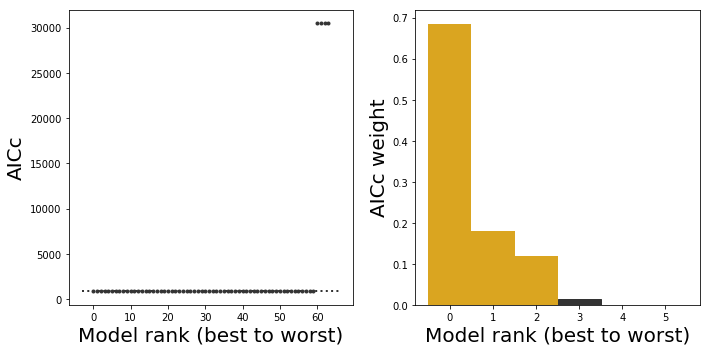

In [9]:
#Unsorted lists definitions (i.e. models are ordered as they were estimated, not according to a ranking based on a selection criterion)
Models=[()]
Likelihoods=[Data[0][-1]]
AICs=[SC.AIC(Data[0][-1],0)]
AICcs=[SC.AICc(Data[0][-1],(3*duration),0)]

for i in range(1,7):
    for j in combinations(np.arange(6),i):
        Models+=[j]
        Likelihoods+=[Data[i][j][-1]]
        AICs+=[SC.AIC(Data[i][j][-1],len(j))]
        AICcs+=[SC.AICc(Data[i][j][-1],3*duration,len(j))]

Delta = np.array(AICcs)-np.min(AICcs)  #AICc difference between each model and the best one
Weights=np.exp(-0.5*Delta)/np.sum(np.exp(-0.5*Delta))  #AICcs weight of each model

Parameters=np.empty((6,len(Models)))
Relative_params=np.empty((64,len(Disp_params)))

for i in range(len(Models)):
    model=Models[i]
    Parameters[:,i]=Data[len(model)][model][:-1]

Disp_xticks=[]
for i in range(len(Disp_params)):
    Relative_params[:,i] = Parameters[Disp_params[i]]/Params_DMSO[Disp_params[i]]
    Disp_xticks+=[xticks[Disp_params[i]]]

arg=np.argsort(AICcs) #list of models indexes sorted by increasing AICc
Best_models_AICc=[]  #list of best models according to the AICc criterion
Best_models_w = [] #list of best models according to the Akaike's weight
Weights_sorted=np.sort(Weights)[::-1] #list of models Akaike's weights sorted decreasingly

plt.rcParams['figure.figsize']=10,5
f,ax=plt.subplots(1,2)

#Building the ranking by AICc
for i in arg:
    if AICcs[i]<=AICcs[arg[0]]+10:  #we use the D_AICc < 10 criterion for a "good fit".
        Best_models_AICc+=[i]

#Building the ranking by Aikaike's weights
imax=0
while np.sum(Weights_sorted[:imax]) <=0.95:
    Best_models_w+=[arg[imax]]
    print('Model',Models[arg[imax]])   #we remind which parameters vary in that model
    print('-2ln(L): %.4g\tAIC:    %.4g\tAICc:   %.4g\tDelta:  %.4g\tW:      %.4g'%(Likelihoods[arg[imax]],AICs[arg[imax]],AICcs[arg[imax]],Delta[arg[imax]],Weights[arg[imax]]))
    imax+=1
    
print("\nNumber of good models according to w_AICc: %i\n"%imax)

for i in range(len(arg)):
    ax[0].plot(i,AICcs[arg[i]],'.',c='0.2')
ax[0].plot(ax[0].get_xlim(),[10+np.min(AICcs),10+np.min(AICcs)],':',linewidth=2,c='0.2',label='min(AICc)+10')
ax[0].set_xlabel('Model rank (best to worst)',fontsize=20)
ax[0].set_ylabel('AICc',fontsize=20)
#plt.legend(loc='upper left',fontsize=20)

ax[1].bar(np.arange(imax),np.sort(Weights)[::-1][:imax],1,facecolor=color,edgecolor=None)
ax[1].bar(np.arange(imax,2*imax),np.sort(Weights)[::-1][imax:2*imax],1,facecolor='0.2',edgecolor='0.2')
ax[1].set_xlabel('Model rank (best to worst)',fontsize=20)
ax[1].set_ylabel('AICc weight',fontsize=20)

plt.tight_layout()

savefig=True
if savefig:
    plt.savefig('../figures/04_MB3_parameter_estimation/%s_%id_MB3_Selection.pdf'%(experiment, duration-1),dpi='figure',bbox_inches='tight')

# Representation with a jitter plot

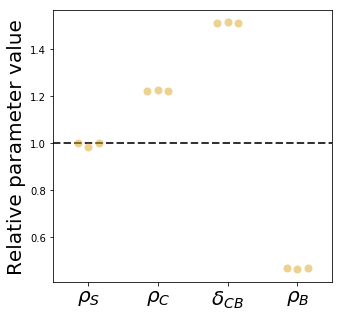

In [11]:
plt.rcParams['figure.figsize']=(5,5)

plt.xlim(-0.5,3.5)
plt.plot(plt.xlim(), (1,1), '--', c='0.2', linewidth=2)

Relative_params=np.empty((64,len(Disp_params)))
Disp_xticks=[]
for i in range(len(Disp_params)):
    Relative_params[:,i] = Parameters[Disp_params[i]]/Params_DMSO[Disp_params[i]]
    Disp_xticks+=[xticks[Disp_params[i]]]

x = np.array([-0.15,0,0.15])
for i in range(len(Disp_params)):
    for j in range(imax):
        plt.plot(x[j]+i, Relative_params[arg[j],i], 'o', markersize=8, c=color, alpha=0.5, markeredgecolor='None')

plt.xticks(np.arange(len(Disp_xticks)),Disp_xticks,fontsize=20)
plt.ylabel('Relative parameter value', fontsize=20)

savefig=True
if savefig:
    plt.savefig('../figures/04_MB3_parameter_estimation/%s_%id_MB3_BestModelRelativeParametersJitter.pdf'%(experiment, duration-1), dpi='figure', bbox_inches='tight')

# Simulation

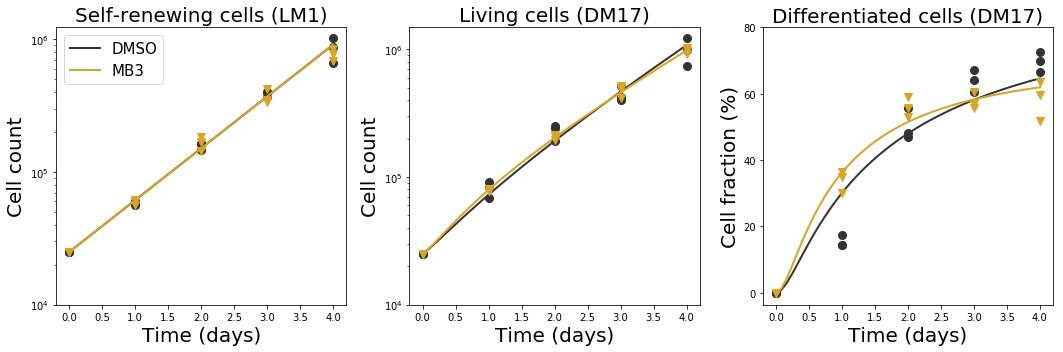

In [22]:
plt.rcParams['figure.figsize']=15,5
f, ax=plt.subplots(1,3)

T=np.linspace(0, duration-1)

Exp=np.array([DMSO_data, MB3_data])
Exp[:,:,2]/=Exp[:,:,1]

Params_MB3=Parameters[:,arg[0]]
Params = np.array((Params_DMSO, Params_MB3))

colors=('0.2',color)
markers = ('o', 'v')
Labels=('Self-renewing cells (LM1)', 'Living cells (DM17)', 'Differentiated cells (DM17)')
Ylabels=('Cell count', 'Cell count', 'Cell fraction (%)')
Treatments=('DMSO','MB3')

for i in range(2): #treatment
    rhoS, b1, rhoC, deltaCB, rhoB, b2 = Params[i]
    deltaSC = rhoS + 0.5*np.log(25000)
    S_simul = SCBe.S(T, 25000, rhoS)
    TB_simul = SCBe.TB(T, [25000,0,0], rhoS, deltaSC, rhoC, deltaCB, rhoB)
    Simul = np.vstack((S_simul, TB_simul[0], TB_simul[1]/TB_simul[0]))
    
    for j in range(3):
        for k in range(len(Experiments)):
            ax[j].plot(t, Exp[i,k,j],markers[i],markersize=8,c=colors[i], markeredgecolor=colors[i])
        ax[j].plot(T, Simul[j], linewidth=2, c=colors[i], label=Treatments[i])
        if j <=1:
            ax[j].set_yscale('log')
        ax[j].set_title(Labels[j], fontsize=20)
        ax[j].set_xlabel('Time (days)', fontsize=20)
        ax[j].set_ylabel(Ylabels[j], fontsize=20)
        ax[j].set_xlim((-0.2, duration-0.8))
for j in range(2):
    ax[j].set_yticks((1e4, 1e5, 1e6)) 
ax[2].set_yticks(0.2*np.arange(5))
ax[2].set_yticklabels(['0','20','40','60','80'])
ax[0].legend(loc='upper left',fontsize=15)
plt.tight_layout()

savefig=True
if savefig:
    plt.savefig('../figures/04_MB3_parameter_estimation/%s_%id_MB3_BestModel_Simulation.pdf'%(experiment, duration-1), dpi='figure', bbox_inches='tight')